# Chapter 01- Exploratory Data Analysis

Dataset Link : https://www.kaggle.com/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Data/Medals.xlsx')

C:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
data.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


## Estimates of Location

**Mean (Average)**:
The mean or average is the sum of all values in a dataset divided by the total number of values. It gives you a measure of the central tendency of the data.
- Mean is sensitive to Outliers

In [4]:
# Mean
data['Total'].mean()

11.612903225806452

**Weighted Mean (Weighted Average)**:
The weighted mean is similar to the mean, but each value is multiplied by a weight before calculating the average. The weights represent the importance or significance of each value.

In [5]:
#Weighted Mean

np.average(data['Total'],weights=data['Gold'])

46.832352941176474

**Trimmed Mean (Truncated Mean)**:
The trimmed mean is the average of all values after removing a fixed number or percentage of extreme values from both ends of the dataset. It is used to reduce the impact of outliers on the mean.

In [6]:
#Trimmed Mean
from scipy.stats import trim_mean
trim_mean(data['Total'],0.1)

6.8933333333333335

**Robust** : obust refers to a statistical measure or method that is not sensitive to extreme values or outliers. It provides more stable and reliable results even in the presence of outliers.

**Median**:
The median is the middle value of a dataset when it is sorted in ascending or descending order. It divides the data into two equal halves. If the number of values is even, the median is the average of the two middle values.

In [7]:
#Median 
data['Total'].median()

4.0

**Weighted Median**:
The weighted median is similar to the median, but it takes into account the weights assigned to each value. It is the value such that half of the sum of the weights lies above and below the sorted data.

In [8]:
# Weighted Median

def weighted_median(data, weights):
    sorted_data, sorted_weights = zip(*sorted(zip(data, weights)))
    cum_weights = np.cumsum(sorted_weights)
    total_weight = cum_weights[-1]
    median_idx = np.searchsorted(cum_weights, total_weight / 2.0)
    if total_weight % 2 == 0 or cum_weights[median_idx] > total_weight / 2.0:
        return sorted_data[median_idx]
    else:
        return (sorted_data[median_idx] + sorted_data[median_idx + 1]) / 2.0

result = weighted_median(data['Total'], data['Gold'])
print(result)


40


**Percentile (Quantile)**:
The percentile is the value below which a given percentage of the data falls. For example, the 50th percentile is the median, which divides the data into two equal parts.

In [9]:
#Percentile
# 75th percentile
np.percentile(data['Total'], 75)

11.0

**Outlier (Extreme Value)**:
An outlier or extreme value is a data point that is significantly different from the other values in a dataset. It is an observation that lies an abnormal distance away from other observations. Outliers can sometimes skew the results of statistical analysis.

In [10]:
data.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


## Estimation of Variability

Variability is the heart of statistics and where a lot of information on a dataset can be gleaned.

**********************Deviations:********************** The difference between observed values and the estimate of location. Also called Errors or Residuals.

**Variance**: Square the deviations, from the mean, divide by n-1 where n is the number of instances.

In [11]:
# Variance

from statistics import variance
variance(data['Gold'])

49.315100514259

**Standard Deviation** : Square root of the variance

In [12]:
# Standard Deviation 

from statistics import stdev
stdev(data['Gold'])

7.022471111671375

**Mean Absolute Deviation**: Mean of the absolute values of the deviations from the mean, also known as l1-norm or Manhattan Norm

In [13]:
from numpy import mean, absolute

mean(absolute(data['Gold']-mean(data['Gold'])))

4.0048560527228565

**Mean Absolute deviation from Median**: Mean of the absolute values of the deviations from the median.

In [14]:
from numpy import mean, median

mean(absolute(data['Gold']-median(data['Gold'])))

3.2580645161290325

In [15]:
# Interquartile Range:
q3,q1 = np.percentile(data['Gold'],[75,25])
iqr = q3- q1
iqr

3.0

## Exploring the Data Distribution

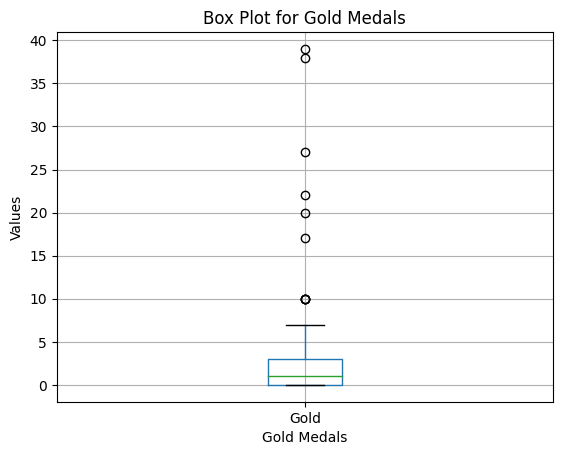

In [37]:

# Assuming 'data' is your DataFrame with the 'Gold' column
data.boxplot(column='Gold', by=None, ax=None)

# Optionally, add labels and title to the plot
plt.xlabel('Gold Medals')
plt.ylabel('Values')
plt.title('Box Plot for Gold Medals')

# Display the plot
plt.show()


In [17]:
pd.cut(data["Gold"],10)

0      (35.1, 39.0]
1      (35.1, 39.0]
2      (23.4, 27.3]
3      (19.5, 23.4]
4      (19.5, 23.4]
          ...      
88    (-0.039, 3.9]
89    (-0.039, 3.9]
90    (-0.039, 3.9]
91    (-0.039, 3.9]
92    (-0.039, 3.9]
Name: Gold, Length: 93, dtype: category
Categories (10, interval[float64, right]): [(-0.039, 3.9] < (3.9, 7.8] < (7.8, 11.7] < (11.7, 15.6] ... (23.4, 27.3] < (27.3, 31.2] < (31.2, 35.1] < (35.1, 39.0]]

In [18]:
frequency_table= data.copy()
frequency_table["freq"]=pd.cut(data["Gold"],10)
frequency_table.groupby("freq")["Rank"].count().reset_index()

,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


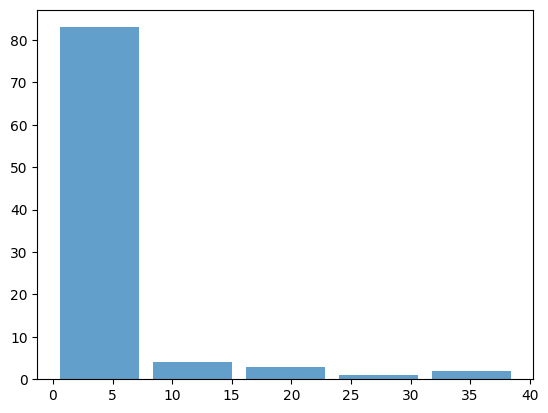

In [19]:
import matplotlib.pyplot as plt

plt.hist(x=data["Gold"],bins=5,alpha=0.7, rwidth=0.85)
plt.show()

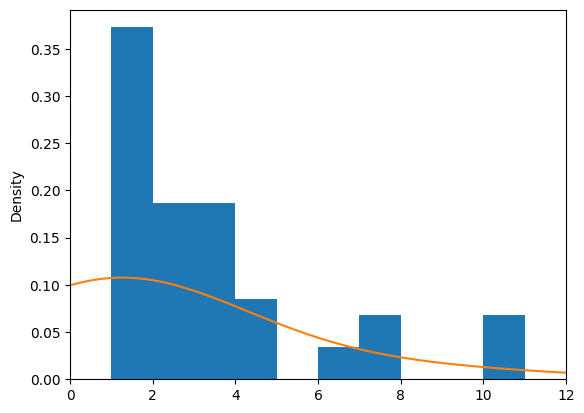

In [20]:
ax=data['Gold'].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
data['Gold'].plot.density(ax=ax)
plt.show()

## Exploring the Binary and Categorical Data

In [21]:
# Mode
data['Gold'].mode()

0    0
Name: Gold, dtype: int64

### Barplots

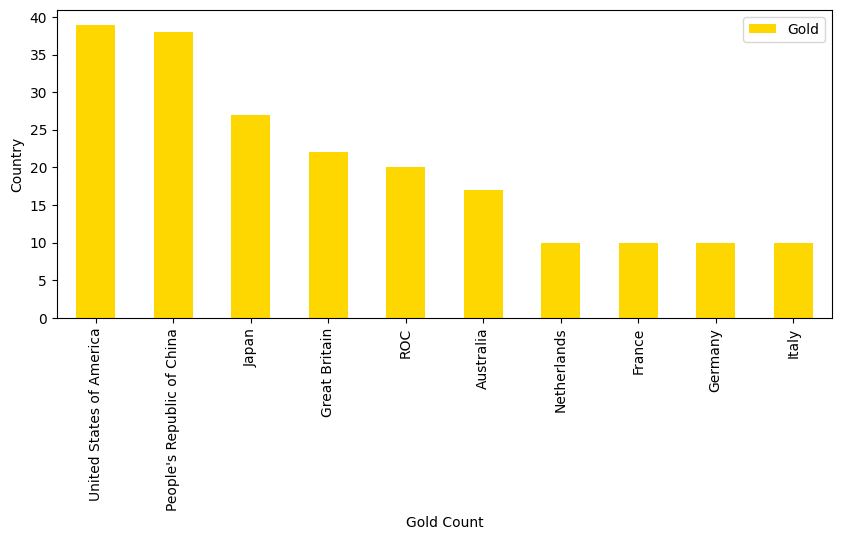

In [22]:
ax = data.iloc[:10].plot.bar(x="Team/NOC",y="Gold",figsize=(10,4),color="Gold")
ax.set_xlabel('Gold Count')
ax.set_ylabel('Country')
plt.show()

### Piecharts

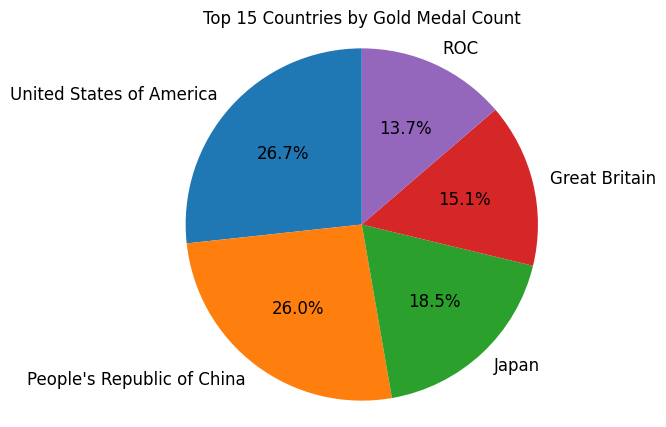

In [23]:
pie_data= data.iloc[:5, :]
plt.figure(figsize=(5, 5))
plt.pie(pie_data["Gold"], labels=pie_data["Team/NOC"],autopct='%1.1f%%', startangle=90,textprops={'fontsize': 12})
plt.title('Top 15 Countries by Gold Medal Count')

# Equal aspect ratio ensures the pie chart is circular.
plt.axis('equal')

# Show the plot
plt.show()

## Exploring Two or More Variables

In [24]:
#Correlation Matrix
data.corr()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15924\775033832.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


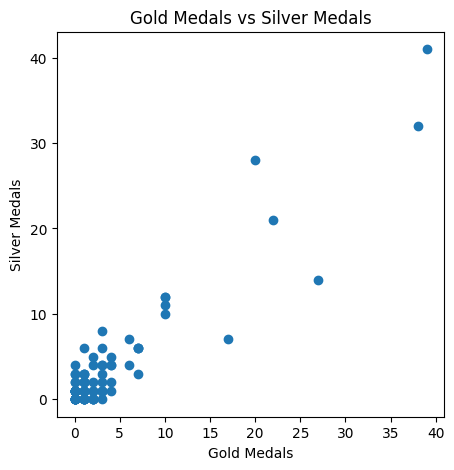

In [25]:
# Create the scatter plot
plt.figure(figsize=(5, 5))
plt.scatter(data["Gold"], data["Silver"], marker="o")

# Add labels and title
plt.xlabel("Gold Medals")
plt.ylabel("Silver Medals")
plt.title("Gold Medals vs Silver Medals")

# Show the plot
plt.show()


### Hexagonal Binning Plot

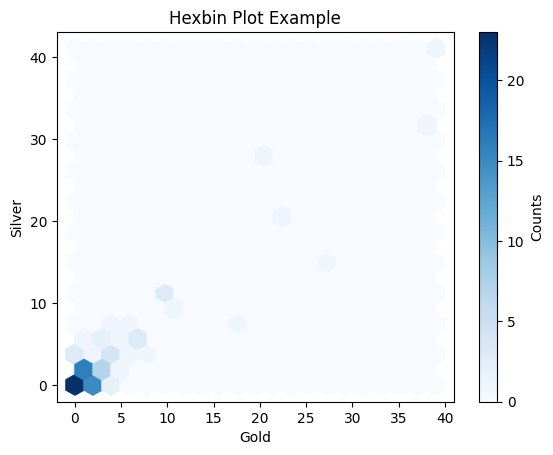

In [30]:
# Creating the hexbin plot
plt.hexbin(data['Gold'], data['Silver'], gridsize=20, cmap='Blues')

# Adding colorbar and labels
plt.colorbar(label='Counts')
plt.xlabel('Gold')
plt.ylabel('Silver')
plt.title('Hexbin Plot Example')

# Display the plot
plt.show()


### Countor Plots

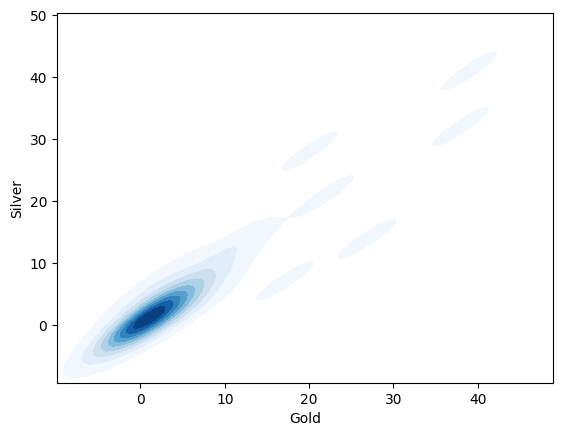

In [44]:
ax= sns.kdeplot(x=data['Gold'],y=data['Silver'],cmap='Blues', fill=True)
plt.show()

### Heatmap

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15924\2914751755.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='Blues', annot=True)


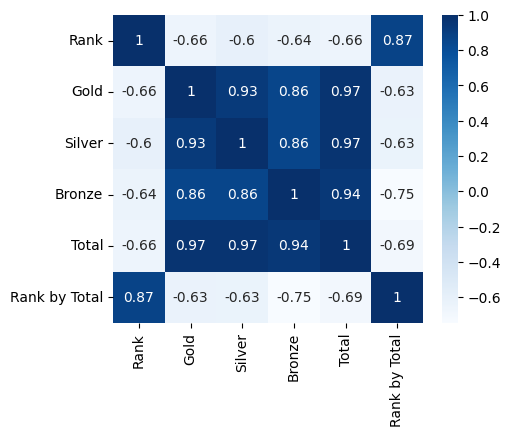

In [51]:
plt.figure(figsize=(5, 4))
# Creating the heatmap for the correlation between 'Gold' and 'Silver'

sns.heatmap(data.corr(), cmap='Blues', annot=True)
# Display the plot
plt.show()

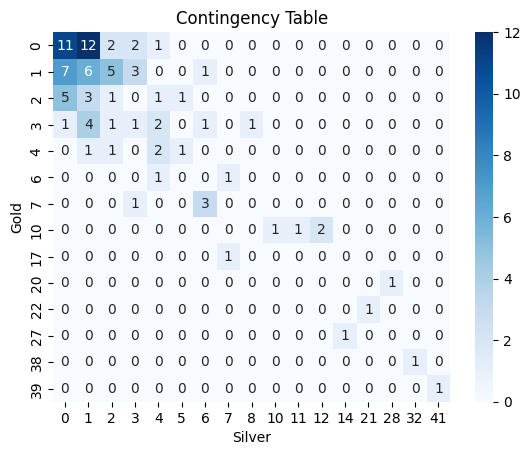

In [52]:
#Create the contingency table using pandas crosstab
contingency_table = pd.crosstab(data['Gold'], data['Silver'])

# Plot the contingency table using Seaborn heatmap
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')

# Adding labels and title
plt.xlabel('Silver')
plt.ylabel('Gold')
plt.title('Contingency Table')

# Display the plot
plt.show()

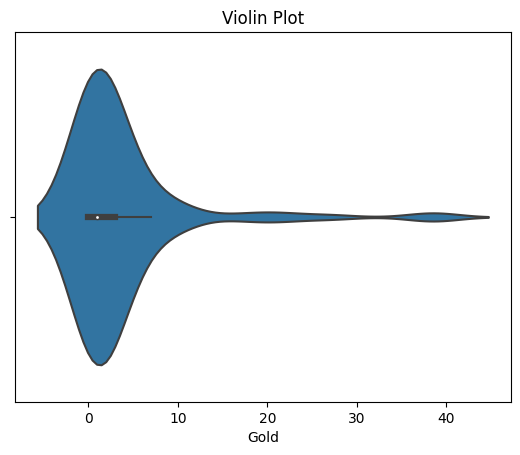

In [55]:
# Creating the violin plot
sns.violinplot(x=data['Gold'])

# Adding title
plt.title('Violin Plot')

# Display the plot
plt.show()

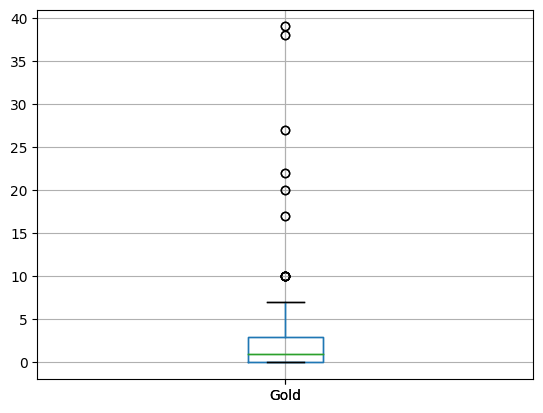

In [57]:
# Boxplot
data.boxplot(column="Gold")
plt.show()